In [74]:
import pandas as pd
import matplotlib.pyplot as plt
#csv file (https://data.cityofchicago.org/Public-Safety/City-of-Chicago-Crime-Data/v9q9-3dm2)
# Import the file into a pandas DataFrame
crime_data = pd.read_csv('Crimes_-_Map.csv')

# Remove spaces at beginning of names
crime_data = crime_data.rename(
    columns={
        ' PRIMARY DESCRIPTION' : 'PRIMARY DESCRIPTION',
        ' SECONDARY DESCRIPTION' : 'SECONDARY DESCRIPTION',
        ' IUCR' : 'IUCR',
        ' LOCATION DESCRIPTION' : 'LOCATION DESCRIPTION'
    }
)


In [75]:
# Creating list of different crimes
crime_types = []

# Adding crimes to list
for i in crime_data['PRIMARY DESCRIPTION']:
    if i in crime_types:
        continue
    else:
        crime_types.append(i)

# Finding the amount of each crime
crime_and_amount = {}
for crime in crime_types:
    new_frame1 = crime_data[crime_data['PRIMARY DESCRIPTION'] == crime]
    new_frame2 = crime_data[crime_data['SECONDARY DESCRIPTION'] == crime]
    count = len(new_frame1) + len(new_frame2)
    crime_and_amount[crime] = count

# Sort the dict. so most occurring crime is in front
crime_amount = {k:v for k,v in sorted(crime_and_amount.items(), key=lambda x:x[1], reverse=True)}


In [76]:
# Percentage of arrest
crime_arrest_percentage = {}
for crime in crime_amount.keys():
    new_frame1 = crime_data.loc[(crime_data['PRIMARY DESCRIPTION'] == crime) & (crime_data["ARREST"] == 'Y')]
    new_frame2 = crime_data.loc[(crime_data['SECONDARY DESCRIPTION'] == crime) & (crime_data["ARREST"] == 'Y')]
    count = len(new_frame1) + len(new_frame2)
    if crime_amount[crime] != 0:
        crime_arrest_percentage[crime] = (count/crime_amount[crime]) * 100
    else:
        crime_arrest_percentage[crime] = 0

# New data frame with crime type and arrest data
df_crime_arrest = pd.DataFrame(
    {
        'Crime Type': list(crime_amount.keys()),
        'Amount': list(crime_amount.values()),
        'Percent Arrested': list(crime_arrest_percentage.values())
    }
)

# Display data
display(df_crime_arrest)


,Crime Type,Amount,Percent Arrested
0,THEFT,57319,5.122211
1,BATTERY,44624,15.706795
2,CRIMINAL DAMAGE,29795,3.084410
3,MOTOR VEHICLE THEFT,26990,2.826973
4,ASSAULT,22800,10.364035
5,OTHER OFFENSE,16115,17.114490
6,DECEPTIVE PRACTICE,15478,3.689107
7,ROBBERY,10971,4.876493
8,WEAPONS VIOLATION,8401,57.600286
9,BURGLARY,7331,4.733324


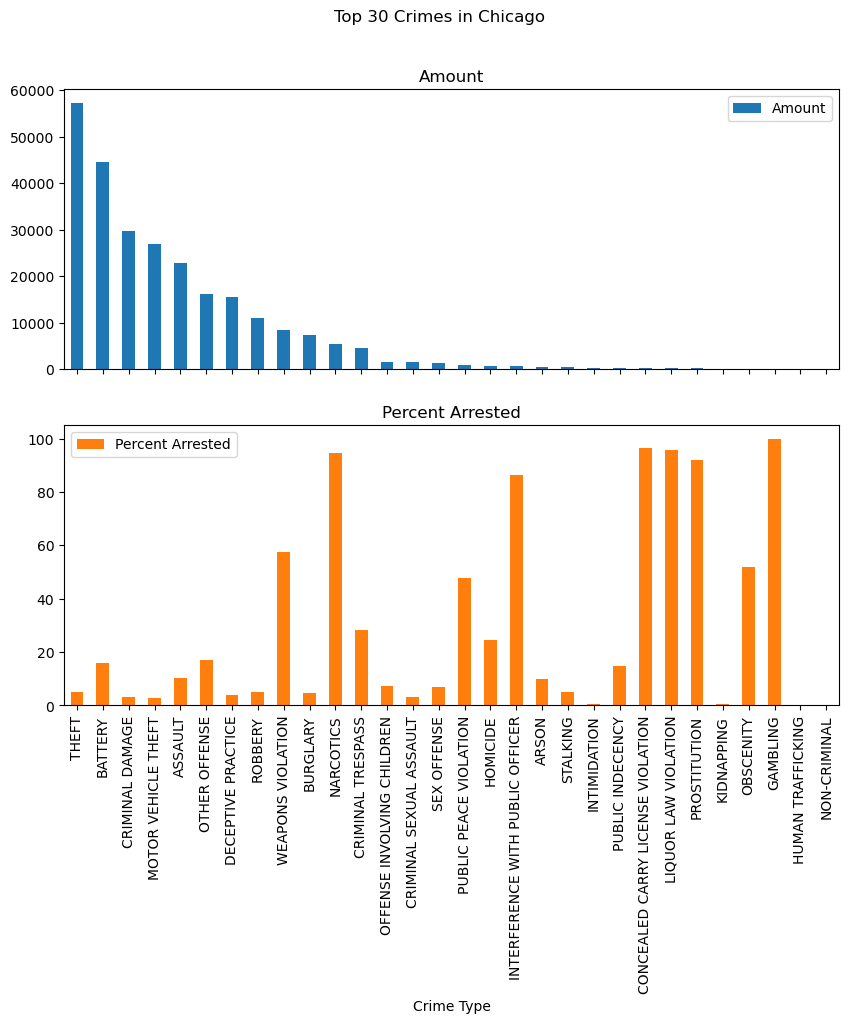

In [77]:
# Creating bar graph
type_vs_amount = df_crime_arrest.head(30).plot.bar(x = 'Crime Type', y = ['Amount', 'Percent Arrested'],
                                                  title = 'Top 30 Crimes in Chicago', subplots = True,
                                                  figsize = (10, 8))
type_vs_amount[1].legend(loc=2)


,Ward,Percent White,Percent Black,Percent Asian,Percent Hispanic,Percent Income <24999,Percent Income 25000-49999,Percent Income 50000-99999,Percent Income 100000-149999,Percent Income >150000,Amount of Crime,Arrests per ward,Arrest Percentage
0,1,78.92,5.54,4.02,34.38,17.54,15.25,28.21,17.65,21.34,4851,361,7.441765
1,2,80.23,7.06,6.96,9.71,16.73,11.76,27.36,16.57,27.58,3956,528,13.346815
2,3,23.16,63.03,9.81,4.82,33.11,16.03,23.03,13.22,14.61,6911,663,9.593402
3,4,25.02,60.88,10.35,4.30,34.69,17.76,23.36,11.39,12.80,8067,942,11.677203
4,5,24.77,62.83,7.82,4.28,40.50,18.29,23.67,8.64,8.91,6044,537,8.884844
5,6,1.19,96.38,0.07,1.82,45.01,23.37,23.70,5.03,2.89,9743,1170,12.008622
6,7,6.01,91.30,0.11,5.07,46.26,22.96,21.68,7.30,1.80,7576,671,8.856917
7,8,1.62,96.77,0.24,1.21,38.52,25.69,24.18,8.08,3.53,7977,705,8.837909
8,9,5.61,92.55,0.15,4.96,38.72,24.75,24.84,7.99,3.70,8040,1102,13.706468
9,10,66.54,25.22,0.23,59.49,34.32,25.26,27.32,9.13,3.97,5401,492,9.109424


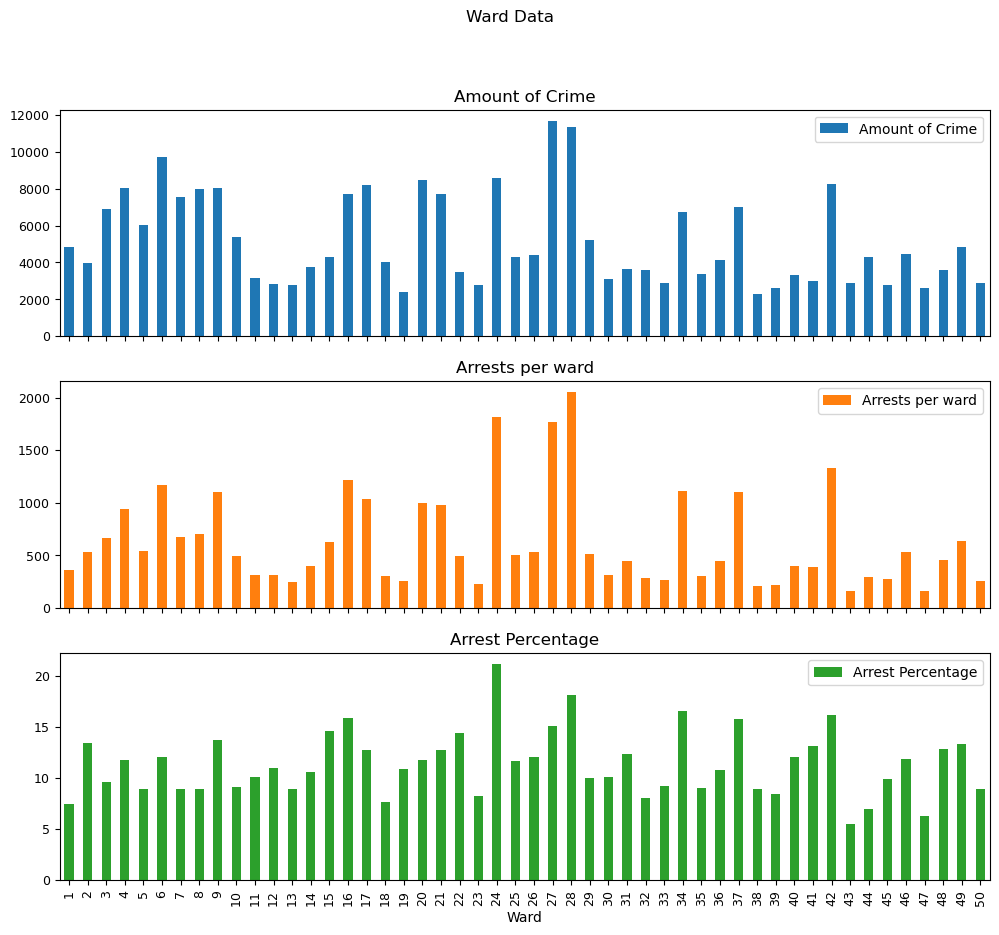

In [78]:
# Amount of crime per ward
ward_crime_amount = {}
for i in crime_data['WARD']:
    if i in ward_crime_amount:
        ward_crime_amount[i] = ward_crime_amount[i] + 1
    else:
        ward_crime_amount[i] = 1

# Sort ward by number
crime_per_ward = {k:v for k, v in sorted(ward_crime_amount.items())}

# Create dict with ward num as ints and get rid of vals with no ward
crime_per_ward_int = {}
for ward in crime_per_ward:
    if ward > 0:
        crime_per_ward_int[int(ward)] = crime_per_ward[ward]

ward_arrests = {}
for i in ward_crime_amount.keys():
    df = crime_data.loc[(crime_data['WARD'] == i) & (crime_data['ARREST'] == 'Y')]
    ward_arrests[i] = len(df)

# Sorting and turning into ints
ward_arrests = {k:v for k, v in sorted(ward_arrests.items())}
ward_arrests_int = {}
for ward in ward_arrests:
    if ward > 0:
        ward_arrests_int[int(ward)] = ward_arrests[ward]

# Find percentage arrest per ward
ward_arrest_percentage = {}
for i in crime_per_ward_int:
    ward_arrest_percentage[i] = (ward_arrests_int[i]/crime_per_ward_int[i]) * 100
#ward csv (https://github.com/lilyli/chicago-ward-demographics/tree/master)
# Import ward data and rename columns
ward_data = pd.read_csv('ward_demographics.csv')
ward_data = ward_data.rename(
    columns={
        'Race-White_pct': 'Percent White',
        'Race-Black_pct': 'Percent Black',
        'Race-Asian_pct': 'Percent Asian',
        'Ethnicity-Hispanic_pct': 'Percent Hispanic',
        'Income-24999_minus_pct': 'Percent Income <24999', 'Income-25000-49999_pct': 'Percent Income 25000-49999', 'Income-50000-99999_pct': 'Percent Income 50000-99999', 'Income-100000-149999_pct': 'Percent Income 100000-149999', 'Income-150000_plus_pct': 'Percent Income >150000',
    }
)

# Clean up unused columns
del ward_data['Unnamed: 0']

# Add crime data to ward demographics data
ward_data['Amount of Crime'] = crime_per_ward_int.values()
ward_data['Arrests per ward'] = ward_arrests_int.values()
ward_data['Arrest Percentage'] = ward_arrest_percentage.values()

# Display the updated ward data
display(ward_data)

# Generate bar graphs for ward-level crime data
ward_bargraph = ward_data.plot.bar(x='Ward', y=['Amount of Crime', 'Arrests per ward', 'Arrest Percentage'],
                                  title='Ward Data', fontsize='9', subplots=True, figsize=(12, 10))


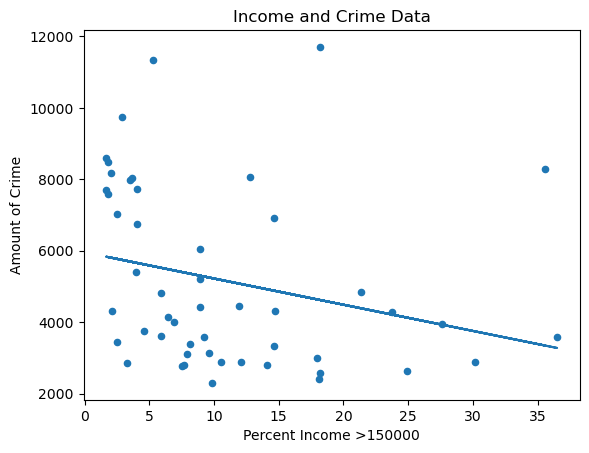

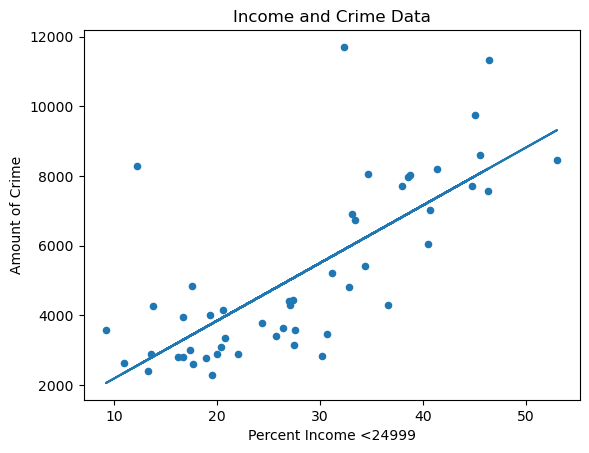

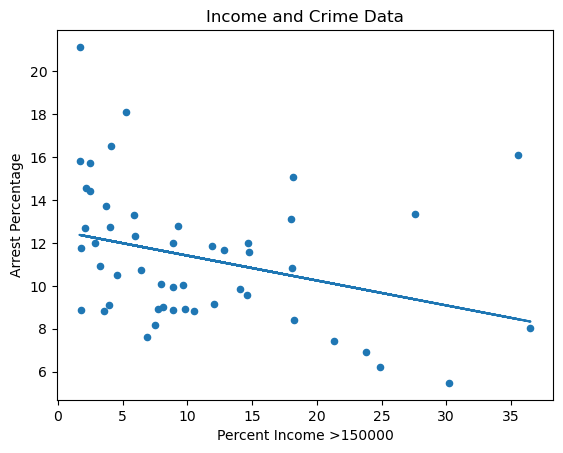

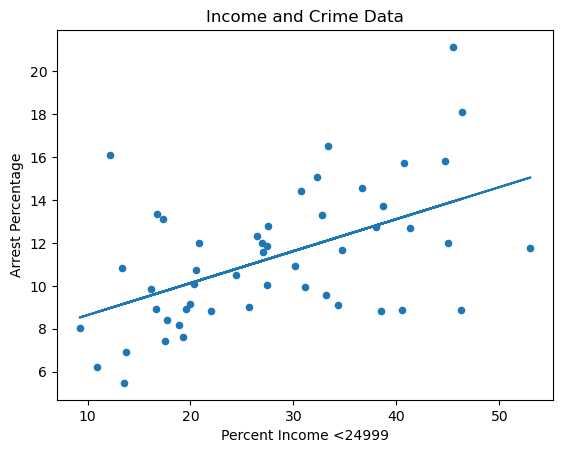

In [79]:
# Define functions for statistical analysis
def slope(xs, ys):
    return ((((xs.mean()) * (ys.mean())) - (xs * ys).mean()) /
            ((xs.mean() * xs.mean() - (xs * xs).mean())))

def y_intercept(xs, ys):
    return ys.mean() - slope(xs, ys) * xs.mean()

# Generate scatter plots for income versus crime amount and arrest percentage
y = (slope(ward_data['Percent Income >150000'], ward_data['Amount of Crime']) * ward_data['Percent Income >150000'] + y_intercept(ward_data['Percent Income >150000'], ward_data['Amount of Crime']))
income_graph = ward_data.plot.scatter(x='Percent Income >150000', y='Amount of Crime', title='Income and Crime Data')
income_graph.plot((ward_data['Percent Income >150000']), y)

y2 = (slope(ward_data['Percent Income <24999'], ward_data['Amount of Crime']) * ward_data['Percent Income <24999'] + y_intercept(ward_data['Percent Income <24999'], ward_data['Amount of Crime']))
income_graph = ward_data.plot.scatter(x='Percent Income <24999', y='Amount of Crime', title='Income and Crime Data')
income_graph.plot((ward_data['Percent Income <24999']), y2)

y3 = (slope(ward_data['Percent Income >150000'], ward_data['Arrest Percentage']) * ward_data['Percent Income >150000'] + y_intercept(ward_data['Percent Income >150000'], ward_data['Arrest Percentage']))
income_graph = ward_data.plot.scatter(x='Percent Income >150000', y='Arrest Percentage', title='Income and Crime Data')
income_graph.plot((ward_data['Percent Income >150000']), y3)

y4 = (slope(ward_data['Percent Income <24999'], ward_data['Arrest Percentage']) * ward_data['Percent Income <24999'] + y_intercept(ward_data['Percent Income <24999'], ward_data['Arrest Percentage']))
income_graph = ward_data.plot.scatter(x='Percent Income <24999', y='Arrest Percentage', title='Income and Crime Data')
income_graph.plot((ward_data['Percent Income <24999']), y4)




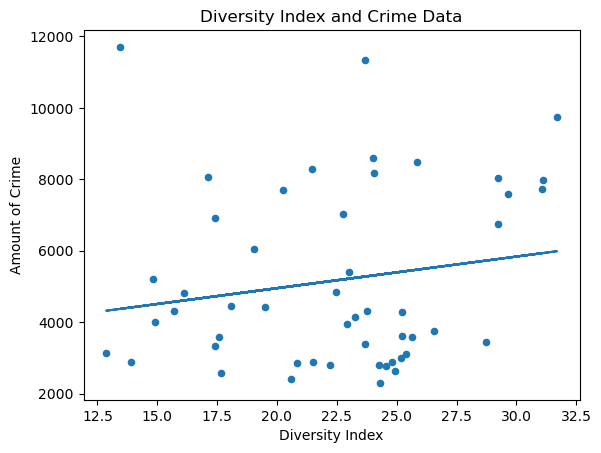

In [80]:
# Calculate the Diversity Index as the standard deviation of selected socioeconomic factors
ward_data['Diversity Index'] = ward_data[['Percent White', 'Percent Black', 'Percent Asian', 'Percent Hispanic', 'Percent Income <24999', 'Percent Income 25000-49999', 'Percent Income 50000-99999', 'Percent Income 100000-149999', 'Percent Income >150000']].std(axis=1)

# Calculating the line of best fit values
y5 = (slope(ward_data['Diversity Index'],
           ward_data['Amount of Crime'])*(ward_data['Diversity Index']) + y_intercept(ward_data['Diversity Index'],
                                                                                     ward_data['Amount of Crime']))

# Plotting the scatter plot and line of best fit
diversity_crime_graph = ward_data.plot.scatter(x = 'Diversity Index', y = 'Amount of Crime',
                                               title = 'Diversity Index and Crime Data')
diversity_crime_graph.plot((ward_data['Diversity Index']), y5)



<Figure size 1000x600 with 0 Axes>

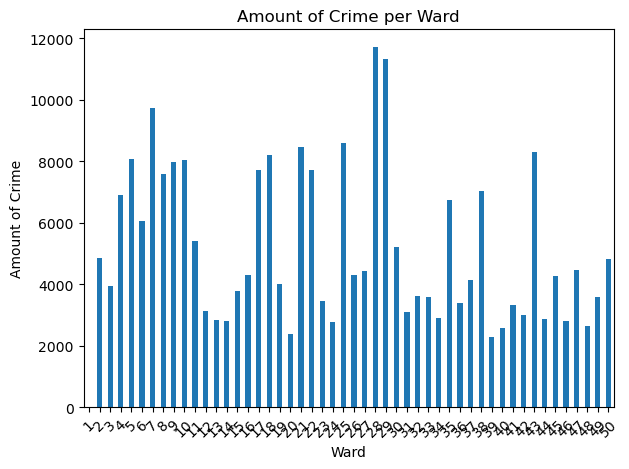

<Figure size 1000x600 with 0 Axes>

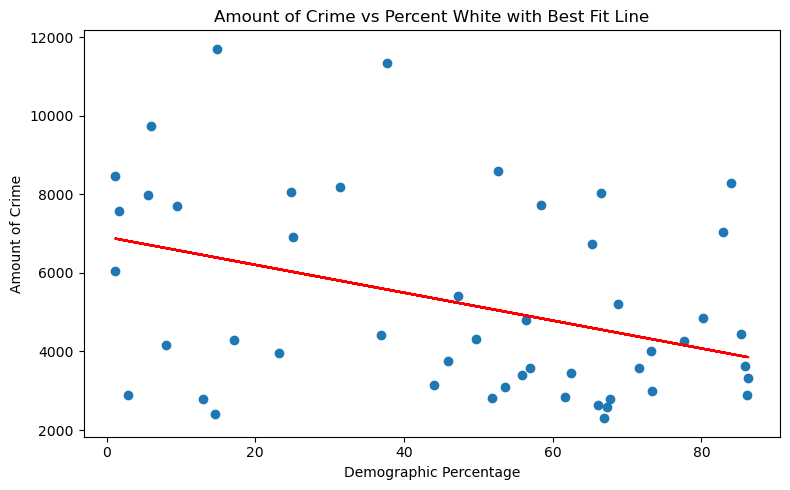

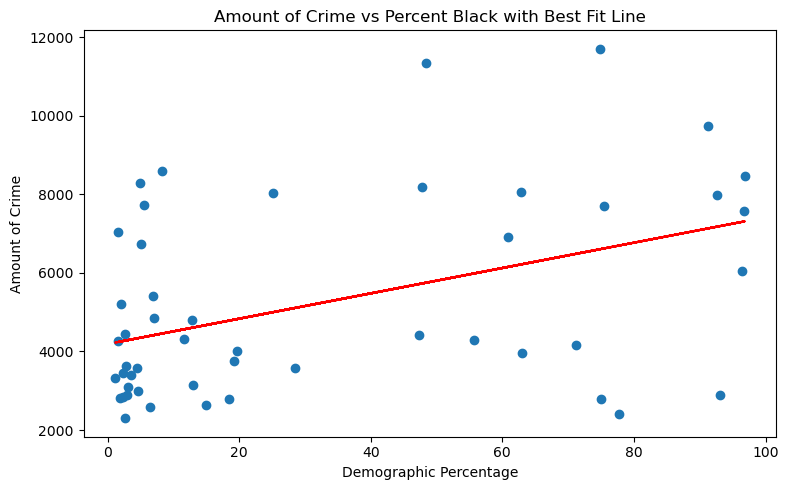

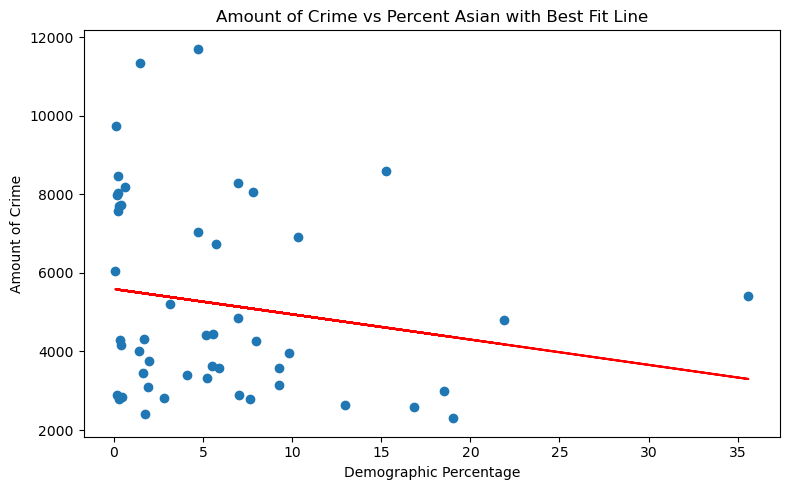

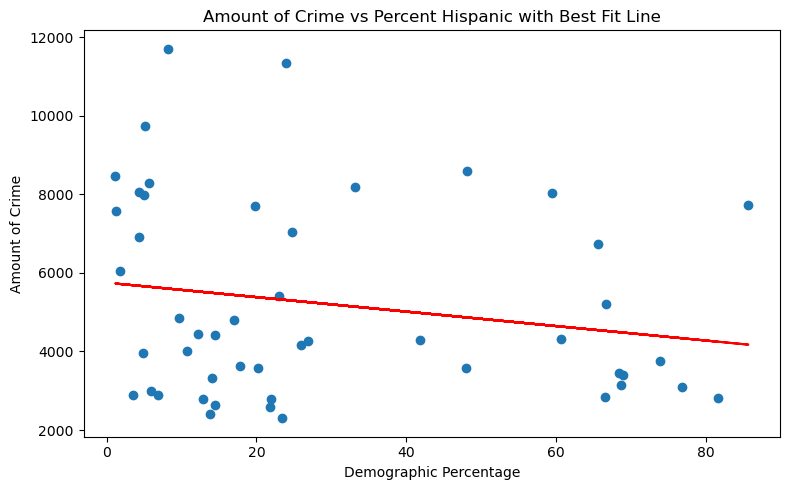

In [81]:
ward_crime_amount = crime_data['WARD'].value_counts().sort_index()

# Merge ward crime data with ward demographic data
ward_data['Amount of Crime'] = ward_crime_amount

# Plotting crime amount per ward
plt.figure(figsize=(10, 6))
ward_data.plot.bar(x='Ward', y='Amount of Crime', title='Amount of Crime per Ward', legend=None)
plt.xlabel('Ward')
plt.ylabel('Amount of Crime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ward_data['Amount of Crime'] = ward_crime_amount

# Set up the figure
plt.figure(figsize=(10, 6))

# Generate scatter plots for each demographic
for demographic in ['Percent White', 'Percent Black', 'Percent Asian', 'Percent Hispanic']:
    plt.figure(figsize=(8, 5))
    plt.scatter(ward_data[demographic], ward_data['Amount of Crime'])
    
    # Calculate line of best fit
    m = slope(ward_data[demographic], ward_data['Amount of Crime'])
    b = y_intercept(ward_data[demographic], ward_data['Amount of Crime'])
    
    # Plot the best fit line
    plt.plot(ward_data[demographic], m * ward_data[demographic] + b, color='red')
    
    # Set labels and title
    plt.xlabel('Demographic Percentage')
    plt.ylabel('Amount of Crime')
    plt.title(f'Amount of Crime vs {demographic} with Best Fit Line')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()


In [87]:
# Find ward with least crime
ward_least_crime = ward_data.loc[ward_data['Amount of Crime'].idxmin()].dropna().astype(int).to_dict()

# Find ward with most crime
ward_most_crime = ward_data.loc[ward_data['Amount of Crime'].idxmax()].dropna().astype(int).to_dict()

print("Ward with least crime:")
for key, value in ward_least_crime.items():
    print(f"{key}: {value}")

print("\nWard with most crime:")
for key, value in ward_most_crime.items():
    print(f"{key}: {value}")


Ward with least crime:
Ward: 39
Percent White: 66
Percent Black: 2
Percent Asian: 19
Percent Hispanic: 23
Percent Income <24999: 17
Percent Income 25000-49999: 19
Percent Income 50000-99999: 28
Percent Income 100000-149999: 16
Percent Income >150000: 18
Amount of Crime: 2300
Arrests per ward: 218
Arrest Percentage: 8
Diversity Index: 17

Ward with most crime:
Ward: 28
Percent White: 14
Percent Black: 74
Percent Asian: 4
Percent Hispanic: 8
Percent Income <24999: 46
Percent Income 25000-49999: 21
Percent Income 50000-99999: 21
Percent Income 100000-149999: 5
Percent Income >150000: 5
Amount of Crime: 11704
Arrests per ward: 2050
Arrest Percentage: 18
Diversity Index: 23
